# Vishnu Vardhan Reddy
# CSE
# Malla Reddy University

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

In [7]:
df = spark.read.csv("BMW sales data (2010-2024) (1).csv", header=True)

In [8]:
df.show()

+--------+----+-------------+------+---------+------------+-------------+----------+---------+------------+--------------------+
|   Model|Year|       Region| Color|Fuel_Type|Transmission|Engine_Size_L|Mileage_KM|Price_USD|Sales_Volume|Sales_Classification|
+--------+----+-------------+------+---------+------------+-------------+----------+---------+------------+--------------------+
|5 Series|2016|         Asia|   Red|   Petrol|      Manual|          3.5|    151748|    98740|        8300|                High|
|      i8|2013|North America|   Red|   Hybrid|   Automatic|          1.6|    121671|    79219|        3428|                 Low|
|5 Series|2022|North America|  Blue|   Petrol|   Automatic|          4.5|     10991|   113265|        6994|                 Low|
|      X3|2024|  Middle East|  Blue|   Petrol|   Automatic|          1.7|     27255|    60971|        4047|                 Low|
|7 Series|2020|South America| Black|   Diesel|      Manual|          2.1|    122131|    49898|   

In [9]:
df.printSchema()

root
 |-- Model: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine_Size_L: string (nullable = true)
 |-- Mileage_KM: string (nullable = true)
 |-- Price_USD: string (nullable = true)
 |-- Sales_Volume: string (nullable = true)
 |-- Sales_Classification: string (nullable = true)



### Data Showing Type of Transmission

In [13]:
df.groupBy("Transmission").count().show()

+------------+-----+
|Transmission|count|
+------------+-----+
|   Automatic|24846|
|      Manual|25154|
+------------+-----+



### Region wise Data 

In [15]:
df.groupBy("Region").count().show()

+-------------+-----+
|       Region|count|
+-------------+-----+
|       Europe| 8334|
|       Africa| 8253|
|North America| 8335|
|South America| 8251|
|  Middle East| 8373|
|         Asia| 8454|
+-------------+-----+



### Data showing count of each model

In [17]:
df.groupBy("Model").count().show()

+--------+-----+
|   Model|count|
+--------+-----+
|      i3| 4618|
|3 Series| 4595|
|      X6| 4478|
|      X1| 4570|
|7 Series| 4666|
|      X3| 4497|
|5 Series| 4592|
|      M5| 4478|
|      M3| 4413|
|      i8| 4606|
|      X5| 4487|
+--------+-----+



In [19]:
df.groupBy("Fuel_Type").count().show()

+---------+-----+
|Fuel_Type|count|
+---------+-----+
|   Diesel|12263|
|   Hybrid|12716|
| Electric|12471|
|   Petrol|12550|
+---------+-----+



# Descriptive Analytics

### Calculating  Average, min, max, and total sales per year

In [22]:
from pyspark.sql.functions import mean, min, max, sum,col
sales_by_year = (
    df.groupBy("Year")
        .agg(
            mean("Sales_Volume").alias("mean_sales"),
            min("Sales_Volume").alias("min_sales"),
            max("Sales_Volume").alias("max_sales"),
            sum("Sales_Volume").alias("total_sales")
        )
        .orderBy("Year")
)

sales_by_year.show()

+----+-----------------+---------+---------+-----------+
|Year|       mean_sales|min_sales|max_sales|total_sales|
+----+-----------------+---------+---------+-----------+
|2010|5085.118618618619|      100|     9998|1.6933445E7|
|2011|5112.550640634533|     1002|     9999|1.6758941E7|
|2012|5027.579531812725|     1004|     9998|1.6751895E7|
|2013|5071.176488274204|     1001|     9998|1.6866733E7|
|2014|5062.376119402985|     1002|     9994| 1.695896E7|
|2015| 5065.57683144729|     1001|     9994|1.7010207E7|
|2016|5039.390787518573|     1004|     9995| 1.695755E7|
|2017|5051.918237082067|      100|     9999|1.6620811E7|
|2018|5006.794691885296|     1003|     9996|1.6412273E7|
|2019|5068.383254716981|      100|     9998|1.7191956E7|
|2020|5089.186583463338|     1001|     9990|1.6310843E7|
|2021|5007.314946619217|      100|     9992|1.6884666E7|
|2022|5152.658424381829|     1000|     9999|1.7920946E7|
|2023|5053.946567256912|     1001|     9996|1.6268654E7|
|2024|5114.634957688941|     10

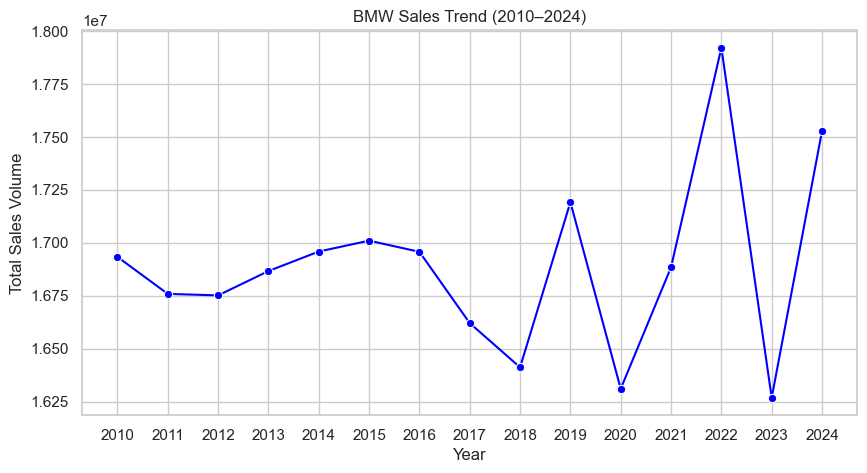

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sales_by_year = (
    df.groupBy("Year")
        .agg(sum("Sales_Volume").alias("Total_Sales"))
        .orderBy("Year")
)
pdf_year = sales_by_year.toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Total_Sales", data=pdf_year, marker="o", color="blue")
plt.title("BMW Sales Trend (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.show()


### Total sales by region

In [27]:
from pyspark.sql.functions import sum, col

sales_by_region = (
    df.groupBy("Region")
      .agg(sum("Sales_Volume").alias("Total_Sales"))
      .orderBy(col("Total_Sales").desc())
)

sales_by_region.show()


+-------------+-----------+
|       Region|Total_Sales|
+-------------+-----------+
|         Asia|4.2974277E7|
|       Europe|4.2555138E7|
|North America|4.2402629E7|
|  Middle East| 4.232662E7|
|       Africa|4.1565252E7|
|South America|4.1551818E7|
+-------------+-----------+



C:\Users\vishn\AppData\Local\Temp\ipykernel_24276\1845260827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Sales", y="Region", data=pdf_region, palette="viridis")


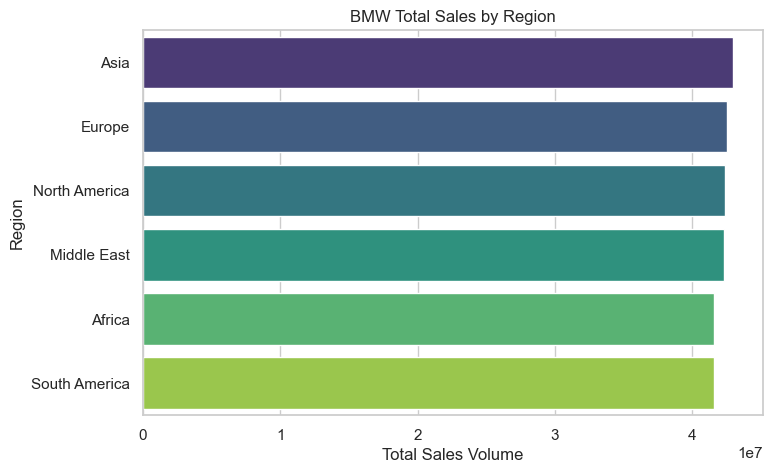

In [29]:
sales_by_region = (
    df.groupBy("Region")
        .agg(sum("Sales_Volume").alias("Total_Sales"))
        .orderBy("Total_Sales", ascending=False)
)
pdf_region = sales_by_region.toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x="Total_Sales", y="Region", data=pdf_region, palette="viridis")
plt.title("BMW Total Sales by Region")
plt.xlabel("Total Sales Volume")
plt.ylabel("Region")
plt.show()

### Top model Sold

In [32]:
top_models = (
    df.groupBy("Model")
        .agg(sum("Sales_Volume").alias("Total_Sales"))
        .orderBy(col("Total_Sales").desc())
        .limit(10)
)
top_models.show()

+--------+-----------+
|   Model|Total_Sales|
+--------+-----------+
|7 Series|2.3786466E7|
|      i8|2.3423891E7|
|      X1| 2.340606E7|
|3 Series|2.3281303E7|
|      i3|2.3133849E7|
|5 Series|2.3097519E7|
|      M5|2.2779688E7|
|      X3|2.2745529E7|
|      X5|2.2709749E7|
|      X6|2.2661986E7|
+--------+-----------+



C:\Users\vishn\AppData\Local\Temp\ipykernel_24276\1627757983.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Sales", y="Model", data=pdf_models, palette="coolwarm")


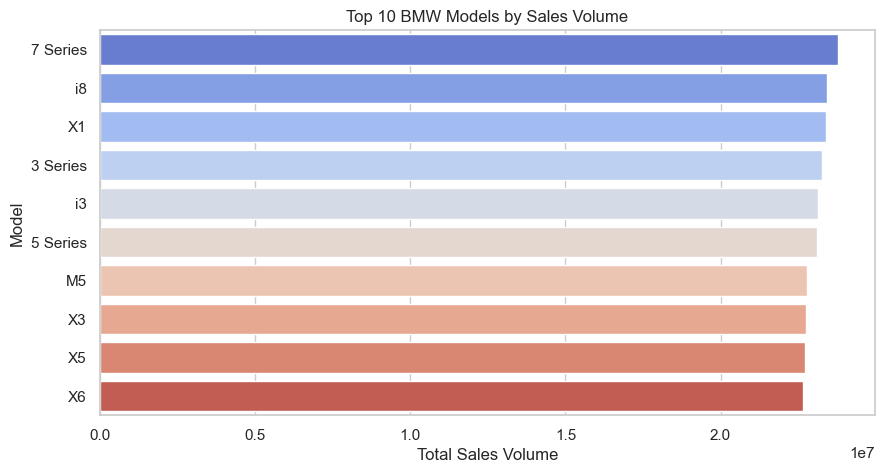

In [34]:
top_models = (
    df.groupBy("Model")
        .agg(sum("Sales_Volume").alias("Total_Sales"))
        .orderBy("Total_Sales", ascending=False)
        .limit(10)
)
pdf_models = top_models.toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x="Total_Sales", y="Model", data=pdf_models, palette="coolwarm")
plt.title("Top 10 BMW Models by Sales Volume")
plt.xlabel("Total Sales Volume")
plt.ylabel("Model")
plt.show()

# Trend Analysis

In [47]:
from pyspark.sql.functions import sum, avg, round, col, lag
from pyspark.sql.window import Window
import pandas as pd

In [49]:
sales_trend = (
    df.groupBy("Year")
      .agg(sum("Sales_Volume").alias("Total_Sales"))
      .orderBy("Year")
)

sales_trend.show()

+----+-----------+
|Year|Total_Sales|
+----+-----------+
|2010|1.6933445E7|
|2011|1.6758941E7|
|2012|1.6751895E7|
|2013|1.6866733E7|
|2014| 1.695896E7|
|2015|1.7010207E7|
|2016| 1.695755E7|
|2017|1.6620811E7|
|2018|1.6412273E7|
|2019|1.7191956E7|
|2020|1.6310843E7|
|2021|1.6884666E7|
|2022|1.7920946E7|
|2023|1.6268654E7|
|2024|1.7527854E7|
+----+-----------+



In [55]:
# Define window for previous year's value
windowSpec = Window.orderBy("Year")

sales_trend = (
    sales_trend
    .withColumn("Prev_Year_Sales", lag("Total_Sales").over(windowSpec))
    .withColumn("YoY_Growth_%", round(
        ((col("Total_Sales") - col("Prev_Year_Sales")) / col("Prev_Year_Sales")) * 100, 2
    ))
)

sales_trend.show()


+----+-----------+---------------+------------+
|Year|Total_Sales|Prev_Year_Sales|YoY_Growth_%|
+----+-----------+---------------+------------+
|2010|1.6933445E7|           NULL|        NULL|
|2011|1.6758941E7|    1.6933445E7|       -1.03|
|2012|1.6751895E7|    1.6758941E7|       -0.04|
|2013|1.6866733E7|    1.6751895E7|        0.69|
|2014| 1.695896E7|    1.6866733E7|        0.55|
|2015|1.7010207E7|     1.695896E7|         0.3|
|2016| 1.695755E7|    1.7010207E7|       -0.31|
|2017|1.6620811E7|     1.695755E7|       -1.99|
|2018|1.6412273E7|    1.6620811E7|       -1.25|
|2019|1.7191956E7|    1.6412273E7|        4.75|
|2020|1.6310843E7|    1.7191956E7|       -5.13|
|2021|1.6884666E7|    1.6310843E7|        3.52|
|2022|1.7920946E7|    1.6884666E7|        6.14|
|2023|1.6268654E7|    1.7920946E7|       -9.22|
|2024|1.7527854E7|    1.6268654E7|        7.74|
+----+-----------+---------------+------------+



In [57]:
regional_trend = (
    df.groupBy("Year", "Region")
      .agg(sum("Sales_Volume").alias("Total_Sales"))
      .orderBy("Year", "Region")
)

regional_trend.show(10)

+----+-------------+-----------+
|Year|       Region|Total_Sales|
+----+-------------+-----------+
|2010|       Africa|  2855044.0|
|2010|         Asia|  2907671.0|
|2010|       Europe|  2775123.0|
|2010|  Middle East|  2623155.0|
|2010|North America|  2876099.0|
|2010|South America|  2896353.0|
|2011|       Africa|  2760743.0|
|2011|         Asia|  2790615.0|
|2011|       Europe|  2862580.0|
|2011|  Middle East|  2727987.0|
+----+-------------+-----------+
only showing top 10 rows



### Graph Showing sales volume of each region

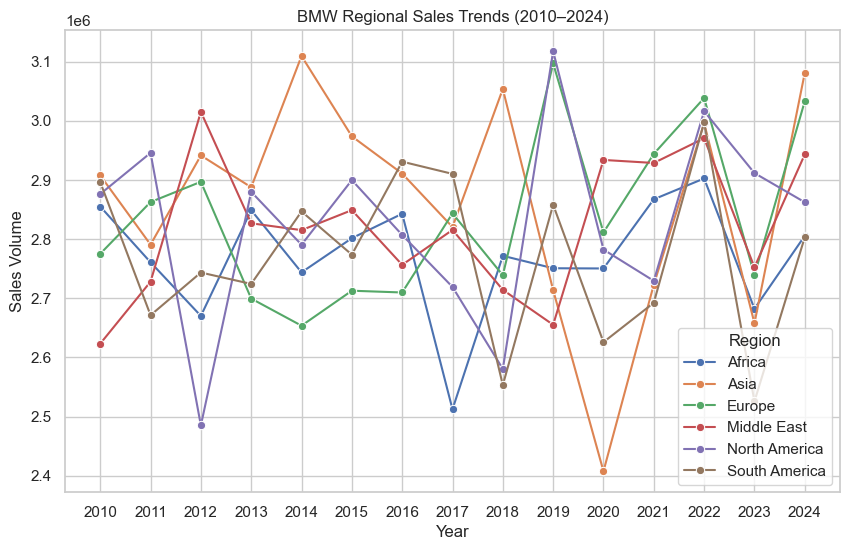

In [60]:
pdf_region = regional_trend.toPandas()
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Total_Sales", hue="Region", data=pdf_region, marker="o")
plt.title("BMW Regional Sales Trends (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend(title="Region")
plt.show()

In [62]:
df.select("Fuel_Type", "Transmission", "Sales_Volume").show(5)

+---------+------------+------------+
|Fuel_Type|Transmission|Sales_Volume|
+---------+------------+------------+
|   Petrol|      Manual|        8300|
|   Hybrid|   Automatic|        3428|
|   Petrol|   Automatic|        6994|
|   Petrol|   Automatic|        4047|
|   Diesel|      Manual|        3080|
+---------+------------+------------+
only showing top 5 rows



### Data showing Total sales with respect to Transmission type

In [65]:
fuel_trans_sales = (
    df.groupBy("Fuel_Type", "Transmission")
      .agg(sum("Sales_Volume").alias("Total_Sales"))
      .orderBy(col("Total_Sales").desc())
)

fuel_trans_sales.show()

+---------+------------+-----------+
|Fuel_Type|Transmission|Total_Sales|
+---------+------------+-----------+
|   Hybrid|      Manual| 3.247872E7|
|   Petrol|      Manual|3.2178797E7|
|   Hybrid|   Automatic|3.2053377E7|
| Electric|   Automatic| 3.176051E7|
| Electric|      Manual|3.1397155E7|
|   Diesel|      Manual|3.1307405E7|
|   Petrol|   Automatic|3.1145357E7|
|   Diesel|   Automatic|3.1054413E7|
+---------+------------+-----------+



### Data showing percentage of sales of different

In [68]:
total_sales = df.agg(sum("Sales_Volume")).collect()[0][0]

fuel_trans_share = (
    fuel_trans_sales
    .withColumn("Percentage", round((col("Total_Sales") / total_sales) * 100, 2))
    .orderBy(col("Percentage").desc())
)

fuel_trans_share.show()

+---------+------------+-----------+----------+
|Fuel_Type|Transmission|Total_Sales|Percentage|
+---------+------------+-----------+----------+
|   Hybrid|      Manual| 3.247872E7|     12.82|
|   Petrol|      Manual|3.2178797E7|      12.7|
|   Hybrid|   Automatic|3.2053377E7|     12.65|
| Electric|   Automatic| 3.176051E7|     12.53|
| Electric|      Manual|3.1397155E7|     12.39|
|   Diesel|      Manual|3.1307405E7|     12.36|
|   Petrol|   Automatic|3.1145357E7|     12.29|
|   Diesel|   Automatic|3.1054413E7|     12.26|
+---------+------------+-----------+----------+



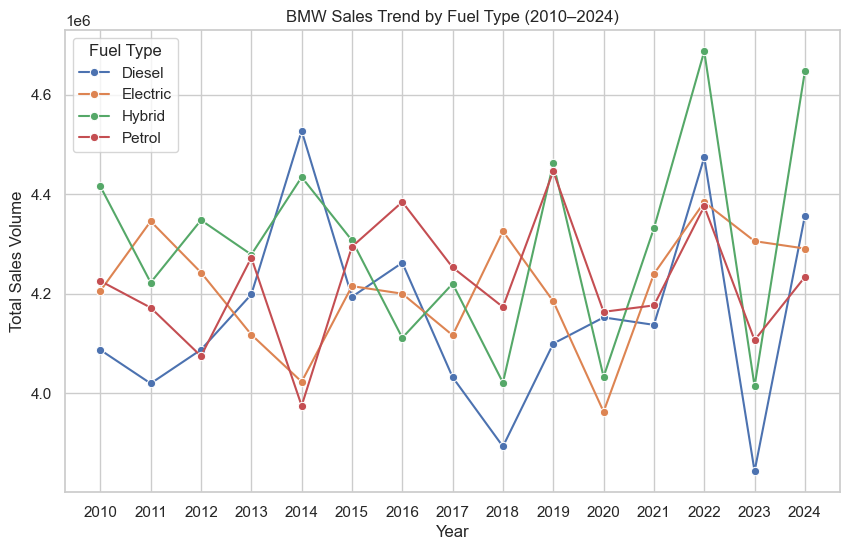

In [70]:
fuel_trend = (
    df.groupBy("Year", "Fuel_Type")
      .agg(sum("Sales_Volume").alias("Total_Sales"))
      .orderBy("Year", "Fuel_Type")
)

fuel_trend_pandas = fuel_trend.toPandas()

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Total_Sales", hue="Fuel_Type", data=fuel_trend_pandas, marker="o")
plt.title("BMW Sales Trend by Fuel Type (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.legend(title="Fuel Type")
plt.show()

### Showing Average price of fuel type with transmission type

In [73]:
fuel_trans_specs = (
    df.groupBy("Fuel_Type", "Transmission")
      .agg(
          avg("Price_USD").alias("Avg_Price_USD"),
          avg("Engine_Size_L").alias("Avg_Engine_L")
      )
      .orderBy("Fuel_Type", "Transmission")
)

fuel_trans_specs.show()

+---------+------------+-----------------+------------------+
|Fuel_Type|Transmission|    Avg_Price_USD|      Avg_Engine_L|
+---------+------------+-----------------+------------------+
|   Diesel|   Automatic|75073.93604746992| 3.246860062633912|
|   Diesel|      Manual|75085.56100710135|3.2483537766300934|
| Electric|   Automatic|75143.63549160672|3.2287290167865623|
| Electric|      Manual|75409.82335907336| 3.242889317889326|
|   Hybrid|   Automatic|75227.15400443178|3.2525166191832877|
|   Hybrid|      Manual|74373.32119412316| 3.248890278211949|
|   Petrol|   Automatic|75237.93506284241|3.2551401869158862|
|   Petrol|      Manual|74748.28877679698|3.2539092055485486|
+---------+------------+-----------------+------------------+



### Bar Graph Showing sales of fuel and Transmission Type

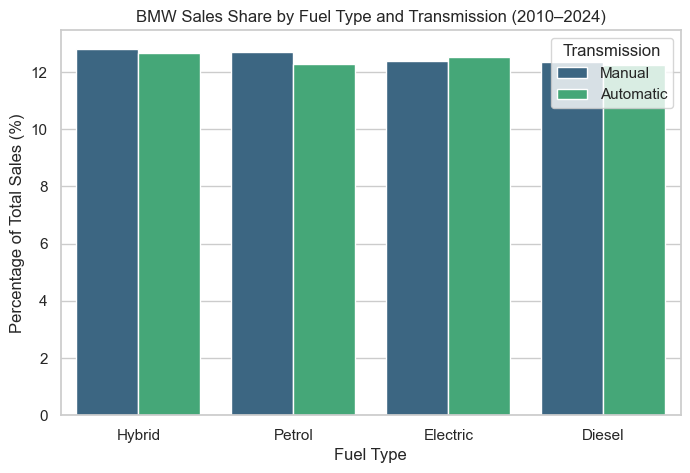

In [76]:
pdf = fuel_trans_share.toPandas()
plt.figure(figsize=(8,5))
sns.barplot(x="Fuel_Type", y="Percentage", hue="Transmission", data=pdf, palette="viridis")
plt.title("BMW Sales Share by Fuel Type and Transmission (2010–2024)")
plt.xlabel("Fuel Type")
plt.ylabel("Percentage of Total Sales (%)")
plt.legend(title="Transmission")
plt.show()

In [82]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag, col, round

windowSpec = Window.orderBy("Year")

yoy_growth = (
    sales_trend
    .withColumn("Prev_Year_Sales", lag("Total_Sales").over(windowSpec))
    .withColumn("YoY_Growth(%)", round(((col("Total_Sales") - col("Prev_Year_Sales")) / col("Prev_Year_Sales")) * 100, 2))
)

yoy_growth.show()

+----+-----------+---------------+------------+-------------+
|Year|Total_Sales|Prev_Year_Sales|YoY_Growth_%|YoY_Growth(%)|
+----+-----------+---------------+------------+-------------+
|2010|1.6933445E7|           NULL|        NULL|         NULL|
|2011|1.6758941E7|    1.6933445E7|       -1.03|        -1.03|
|2012|1.6751895E7|    1.6758941E7|       -0.04|        -0.04|
|2013|1.6866733E7|    1.6751895E7|        0.69|         0.69|
|2014| 1.695896E7|    1.6866733E7|        0.55|         0.55|
|2015|1.7010207E7|     1.695896E7|         0.3|          0.3|
|2016| 1.695755E7|    1.7010207E7|       -0.31|        -0.31|
|2017|1.6620811E7|     1.695755E7|       -1.99|        -1.99|
|2018|1.6412273E7|    1.6620811E7|       -1.25|        -1.25|
|2019|1.7191956E7|    1.6412273E7|        4.75|         4.75|
|2020|1.6310843E7|    1.7191956E7|       -5.13|        -5.13|
|2021|1.6884666E7|    1.6310843E7|        3.52|         3.52|
|2022|1.7920946E7|    1.6884666E7|        6.14|         6.14|
|2023|1.

In [88]:
from pyspark.sql.functions import avg, round

engine_trend = (
    df.groupBy("Year", "Fuel_Type")
      .agg(round(avg("Engine_Size_L"), 2).alias("Avg_Engine_Size"))
      .orderBy("Year")
)

engine_trend.show()

+----+---------+---------------+
|Year|Fuel_Type|Avg_Engine_Size|
+----+---------+---------------+
|2010|   Diesel|           3.23|
|2010| Electric|           3.26|
|2010|   Petrol|           3.25|
|2010|   Hybrid|           3.29|
|2011|   Petrol|           3.31|
|2011|   Diesel|           3.22|
|2011| Electric|           3.22|
|2011|   Hybrid|            3.3|
|2012| Electric|           3.23|
|2012|   Petrol|           3.21|
|2012|   Diesel|           3.26|
|2012|   Hybrid|           3.25|
|2013|   Diesel|           3.26|
|2013|   Petrol|           3.26|
|2013|   Hybrid|           3.29|
|2013| Electric|           3.19|
|2014|   Diesel|           3.22|
|2014|   Petrol|           3.26|
|2014|   Hybrid|           3.22|
|2014| Electric|            3.2|
+----+---------+---------------+
only showing top 20 rows



In [96]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Convert 'Year' column to integer
sales_trend = sales_trend.withColumn("Year", col("Year").cast("int"))

# Create features column
assembler = VectorAssembler(inputCols=["Year"], outputCol="features")
train_data = assembler.transform(sales_trend).select("features", "Total_Sales")

# Train linear regression model
lr = LinearRegression(featuresCol="features", labelCol="Total_Sales")
lr_model = lr.fit(train_data)

# Display model coefficients
print("Coefficient:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)

# Predict future sales for next 3 years
future_years = spark.createDataFrame([(2025,), (2026,), (2027,)], ["Year"])
future_years = assembler.transform(future_years)
predictions = lr_model.transform(future_years)

print("Predicted Sales (2025-2027):")
predictions.select("Year", "prediction").show()


Coefficient: [17892.849999524205]
Intercept: -19198162.84904032
Predicted Sales (2025-2027):
+----+--------------------+
|Year|          prediction|
+----+--------------------+
|2025|1.7034858399996195E7|
|2026| 1.705275124999572E7|
|2027|1.7070644099995244E7|
+----+--------------------+



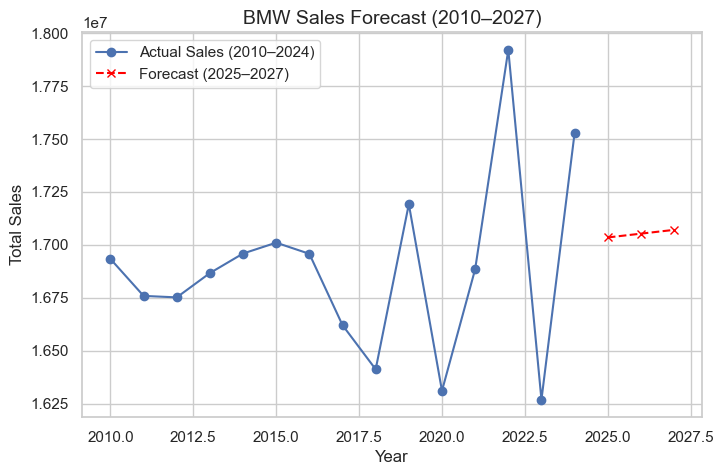

In [98]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt

#  Convert 'Year' to integer
sales_trend = sales_trend.withColumn("Year", col("Year").cast("int"))

#  Create features column
assembler = VectorAssembler(inputCols=["Year"], outputCol="features")
train_data = assembler.transform(sales_trend).select("features", "Total_Sales")

# Train Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Total_Sales")
lr_model = lr.fit(train_data)

#  Predict for next 3 years
future_years = spark.createDataFrame([(2025,), (2026,), (2027,)], ["Year"])
future_years = assembler.transform(future_years)
predictions = lr_model.transform(future_years)

#  Collect data for visualization
actual_data = sales_trend.select("Year", "Total_Sales").toPandas()
pred_data = predictions.select("Year", "prediction").toPandas()

#  Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.plot(actual_data["Year"], actual_data["Total_Sales"], marker='o', label='Actual Sales (2010–2024)')
plt.plot(pred_data["Year"], pred_data["prediction"], marker='x', linestyle='--', color='red', label='Forecast (2025–2027)')

plt.title("BMW Sales Forecast (2010–2027)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


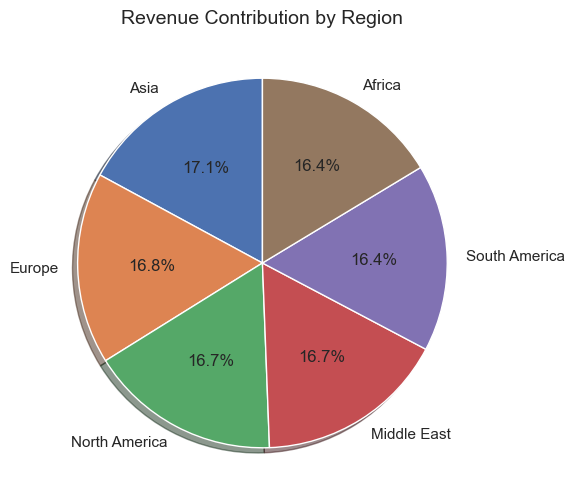

In [100]:
from pyspark.sql.functions import col

revenue_by_region = df.withColumn("Revenue", col("Price_USD") * col("Sales_Volume")) \
                      .groupBy("Region") \
                      .agg(sum("Revenue").alias("Total_Revenue")) \
                      .orderBy("Total_Revenue", ascending=False)

revenue_by_region_pd = revenue_by_region.toPandas()

plt.figure(figsize=(6,6))
plt.pie(revenue_by_region_pd["Total_Revenue"], labels=revenue_by_region_pd["Region"],
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Revenue Contribution by Region", fontsize=14)
plt.show()